In [30]:
%nano dataset.py

UsageError: Line magic function `%nano` not found.


#Подключение библиотек

In [0]:
from convautoencoder import ConvAutoEncoder
from dataset import create_dataset
from subplots import plot_signal, plot_signals, plot_examples, plot_history, network_evaluation, show_confusion_matrix
from tensorflow.keras import backend as K

#Загружаем данные

In [3]:
files_path = "data_emg/" #path to your directory with 10 data.txt files
train_signals, train_labels, val_signals, val_labels, test_signals, test_labels = create_dataset(files_path)

train_signals = train_signals[:, 1:, :]
val_signals = val_signals[:, 1:, :]
test_signals = test_signals[:, 1:, :]

print("Train signal shape: " + str(train_signals.shape))
print("Train labels shape: " + str(train_labels.shape))
print("Test signal shape: " + str(test_signals.shape))
print("Test labels shape: " + str(test_labels.shape))
print("Val signal shape: " + str(val_signals.shape))
print("Val labels shape: " + str(val_labels.shape))

print("Load data successful")

Train signal shape: (474, 480, 1)
Train labels shape: (474, 10)
Test signal shape: (158, 480, 1)
Test labels shape: (158, 10)
Val signal shape: (158, 480, 1)
Val labels shape: (158, 10)
Load data successful


##Выводим случайный сигнал из тренировочной выборки

##Сравниваем два сигнала из тренировочной и тестовой выборки

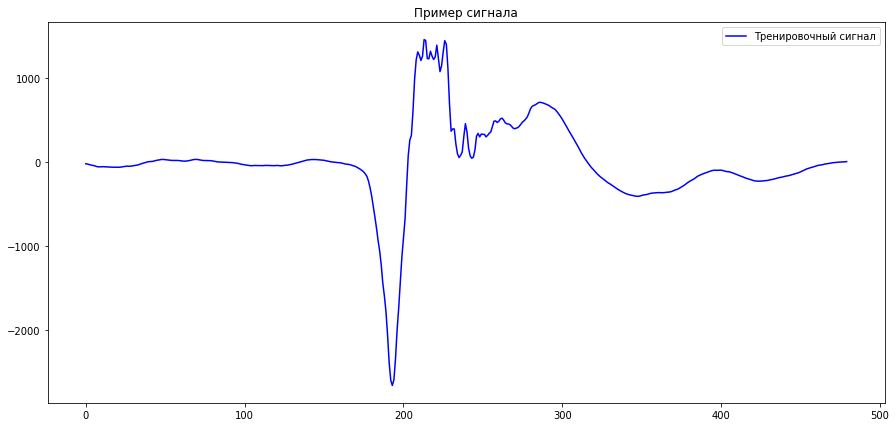

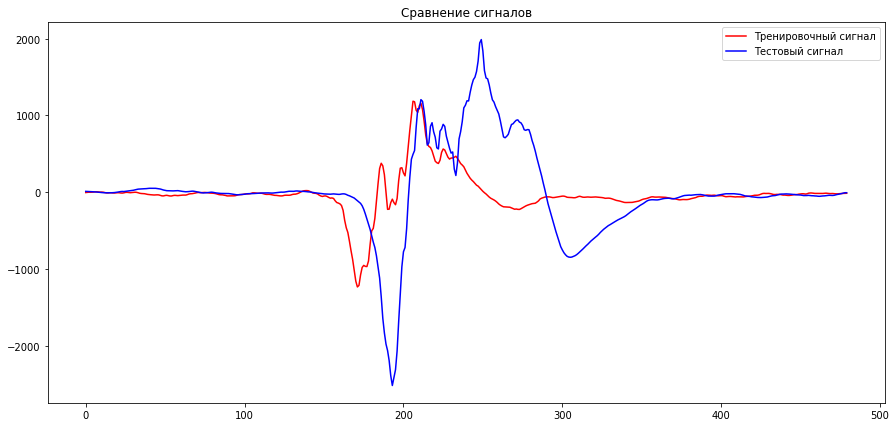

In [4]:
plot_signal(train_signals[0], label = "Тренировочный сигнал", title = "Пример сигнала")

plot_signals(signals = [train_signals[3], test_signals[3]], colors = ['r', 'b'],
             labels = ["Тренировочный сигнал", "Тестовый сигнал"], title = "Сравнение сигналов")

#Обучаем сверточный автоэнкодер

In [5]:
convAutoEncoder = ConvAutoEncoder(signal_len = 480)
model = convAutoEncoder.autoencoder()
history = convAutoEncoder.fit(train_data = train_signals, validation_data = [val_signals, val_signals])

W0624 03:07:42.360933 140074683451264 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 480, 16)           64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 480, 16)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 240, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 240, 1)            49        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 240, 1)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 120, 1)            0     

#Тестируем модель сверточного автоэнкодера

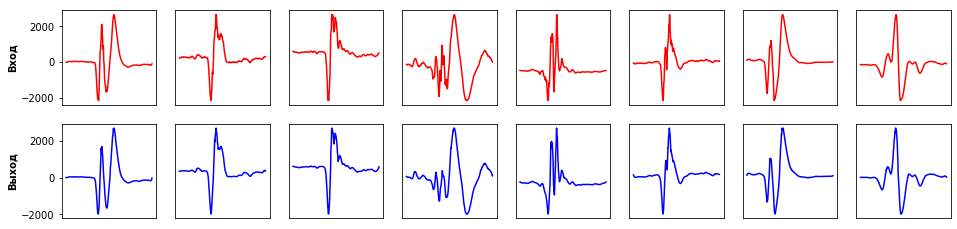

In [6]:
decoded_stocks = model.predict(test_signals)

plot_examples(test_signals, decoded_stocks)

#Выводим сжатое представление сигнала

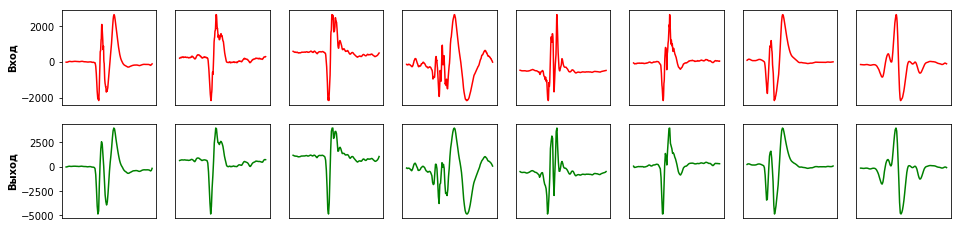

(120, 1)


In [7]:
encoded_data = convAutoEncoder.encoder.predict(test_signals)
plot_examples(test_signals, encoded_data, colors = ['r', 'g'])
print(encoded_data[1].shape)

#Сохраняем веса модели сверточного автоэнкодера

In [0]:
convAutoEncoder.savemodel()

#Подключение дополнительных библиотек

In [0]:
import numpy as np
from tensorflow.python.keras.models import Sequential,  load_model
from tensorflow.python.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, Reshape, LeakyReLU

#Создаем модель сверточной нейронной сети

In [10]:
model_m = Sequential()
model_m.add(Reshape((480, 1), input_shape=(train_signals.shape[1], train_signals.shape[2])))
model_m.add(Conv1D(50, 10, activation='relu', input_shape=(480, 1)))
model_m.add(Conv1D(25, 10, activation='relu'))
model_m.add(MaxPooling1D(4))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(Conv1D(50, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(10, activation='softmax'))
print(model_m.summary())

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 480, 1)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 471, 50)           550       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 462, 25)           12525     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 115, 25)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 106, 100)          25100     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 97, 50)            50050     
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0

#Обучаем сверточную нейронную сеть на обычной выборке данных

In [11]:
history_m = model_m.fit(train_signals, train_labels,
                      steps_per_epoch=10,
                      epochs=20,
                      batch_size=64,
                      validation_data=(val_signals, val_labels),
                      validation_steps=10,
                      verbose=2
)

Epoch 1/20
10/10 - 18s - loss: 10.0190 - acc: 0.1194 - val_loss: 2.2794 - val_acc: 0.1203
Epoch 2/20
10/10 - 18s - loss: 2.2418 - acc: 0.1536 - val_loss: 2.1740 - val_acc: 0.2215
Epoch 3/20
10/10 - 17s - loss: 2.1056 - acc: 0.1878 - val_loss: 1.9817 - val_acc: 0.2532
Epoch 4/20
10/10 - 18s - loss: 1.9748 - acc: 0.2249 - val_loss: 1.8642 - val_acc: 0.2975
Epoch 5/20
10/10 - 18s - loss: 1.8703 - acc: 0.2800 - val_loss: 1.7883 - val_acc: 0.3608
Epoch 6/20
10/10 - 18s - loss: 1.7683 - acc: 0.3198 - val_loss: 1.6703 - val_acc: 0.3797
Epoch 7/20
10/10 - 18s - loss: 1.6758 - acc: 0.3568 - val_loss: 1.6211 - val_acc: 0.4241
Epoch 8/20
10/10 - 18s - loss: 1.6154 - acc: 0.3703 - val_loss: 1.5484 - val_acc: 0.4367
Epoch 9/20
10/10 - 18s - loss: 1.5217 - acc: 0.4108 - val_loss: 1.4502 - val_acc: 0.4494
Epoch 10/20
10/10 - 18s - loss: 1.4686 - acc: 0.4483 - val_loss: 1.4033 - val_acc: 0.5063
Epoch 11/20
10/10 - 18s - loss: 1.4289 - acc: 0.4527 - val_loss: 1.3513 - val_acc: 0.5380
Epoch 12/20
10/10 

##Тестируем сверточную нейронную сеть, обученную на обычной выборке данных

158/158 [==============================] - 0s 698us/sample - loss: 0.8028 - acc: 0.7722
test loss:  0.8027738181850578
Test accuracy: 0.7721519
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


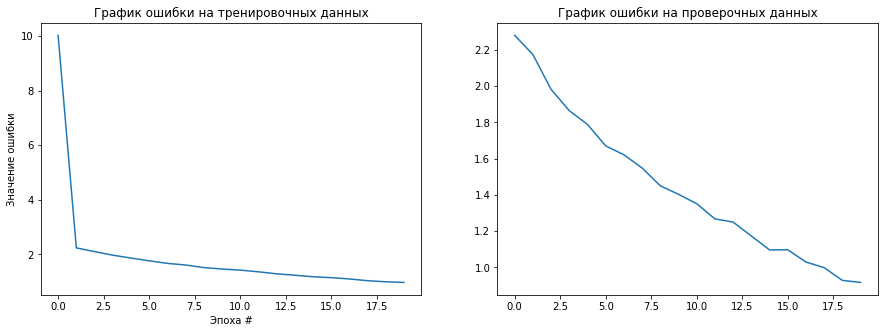

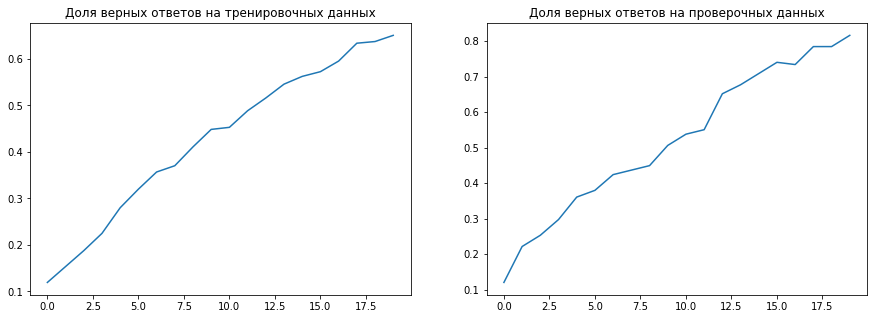

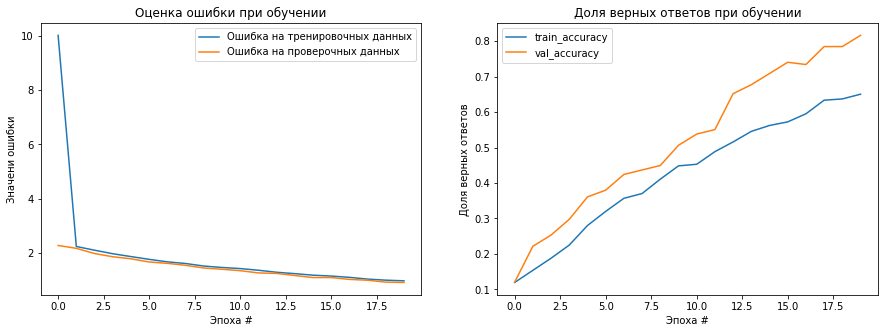

In [12]:
loss, accuracy = model_m.evaluate(x = test_signals, y = test_labels, batch_size=64) # evaluating model on test data
print("test loss: ", loss)
print('Test accuracy:', accuracy)
print(history.history.keys())

plot_history(history_m)
network_evaluation(history=history_m, epochs=20, batch_size=64)

##Матрица ошибок сверточной нейронной сети, обученной на обычной выборке данных


--- Confusion matrix for test data ---



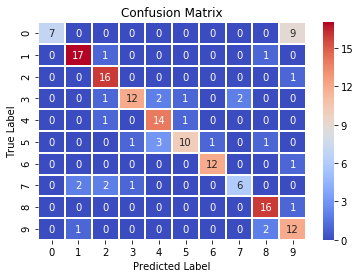

In [13]:
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model_m.predict(test_signals)
# Take the class with the highest probability from the test predictions
y_test = np.asarray(y_pred_test).reshape((len(y_pred_test), np.prod(np.asarray(y_pred_test).shape[1:])))
max_y_pred_test = np.argmax(y_test, axis=1)
max_y_test = np.argmax(test_labels, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

#Загружаем сохранненую модель сверточного энкодера

In [17]:
encoder = load_model(r'./weights/conv_encoder.h5')

W0624 03:31:40.483748 140074683451264 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 03:31:40.489765 140074683451264 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 03:31:40.828943 140074683451264 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


#Преобразовываем обычную выборку данных в сжатое представление

In [0]:
train_signals_en = encoder.predict(train_signals)
val_signals_en = encoder.predict(val_signals)
test_signals_en = encoder.predict(test_signals)

#Создаем модель сверточной нейронной сети с измененной размерность входного слоя

In [21]:
model_e = Sequential()
model_e.add(Reshape((120, 1), input_shape=(train_signals_en.shape[1], train_signals_en.shape[2])))
model_e.add(Conv1D(50, 10, input_shape=(120, 1)))
model_e.add(LeakyReLU(alpha=0.2))
model_e.add(Conv1D(25, 10))
model_e.add(LeakyReLU(alpha=0.2))
model_e.add(MaxPooling1D(4))
model_e.add(Conv1D(100, 10))
model_e.add(LeakyReLU(alpha=0.2))
model_e.add(Conv1D(50, 10))
model_e.add(LeakyReLU(alpha=0.2))
model_e.add(GlobalAveragePooling1D())
model_e.add(Dropout(0.5))
model_e.add(Dense(10, activation='softmax'))
print(model_e.summary())

model_e.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 120, 1)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 111, 50)           550       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 111, 50)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 102, 25)           12525     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 102, 25)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 25, 25)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 16, 100)          

#Обучаем сверточную нейронную сеть на сжатой выборке данных

In [22]:
history_e = model_e.fit(train_signals_en, train_labels,
                      steps_per_epoch=10,
                      epochs=20,
                      batch_size=64,
                      validation_data=(val_signals_en, val_labels),
                      validation_steps=10,
                      verbose=2
)

Epoch 1/20
10/10 - 3s - loss: 27.8724 - acc: 0.2200 - val_loss: 3.0504 - val_acc: 0.4051
Epoch 2/20
10/10 - 3s - loss: 4.2112 - acc: 0.3983 - val_loss: 2.1589 - val_acc: 0.5063
Epoch 3/20
10/10 - 3s - loss: 2.2342 - acc: 0.5196 - val_loss: 1.3877 - val_acc: 0.6456
Epoch 4/20
10/10 - 3s - loss: 1.3726 - acc: 0.6160 - val_loss: 1.0882 - val_acc: 0.7089
Epoch 5/20
10/10 - 3s - loss: 0.9618 - acc: 0.7021 - val_loss: 0.9768 - val_acc: 0.7785
Epoch 6/20
10/10 - 3s - loss: 0.7451 - acc: 0.7597 - val_loss: 0.8795 - val_acc: 0.8354
Epoch 7/20
10/10 - 3s - loss: 0.6165 - acc: 0.8030 - val_loss: 0.7745 - val_acc: 0.8544
Epoch 8/20
10/10 - 3s - loss: 0.5278 - acc: 0.8297 - val_loss: 0.7774 - val_acc: 0.8481
Epoch 9/20
10/10 - 3s - loss: 0.4686 - acc: 0.8500 - val_loss: 0.7258 - val_acc: 0.8608
Epoch 10/20
10/10 - 3s - loss: 0.4245 - acc: 0.8646 - val_loss: 0.7225 - val_acc: 0.8608
Epoch 11/20
10/10 - 3s - loss: 0.3597 - acc: 0.8924 - val_loss: 0.7004 - val_acc: 0.8671
Epoch 12/20
10/10 - 3s - loss

#Тестируем сверточную нейронную сеть, обученную на сжатой выборке данных

158/158 [==============================] - 0s 276us/sample - loss: 0.6353 - acc: 0.8797
test loss:  0.6353346023567116
Test accuracy: 0.87974685


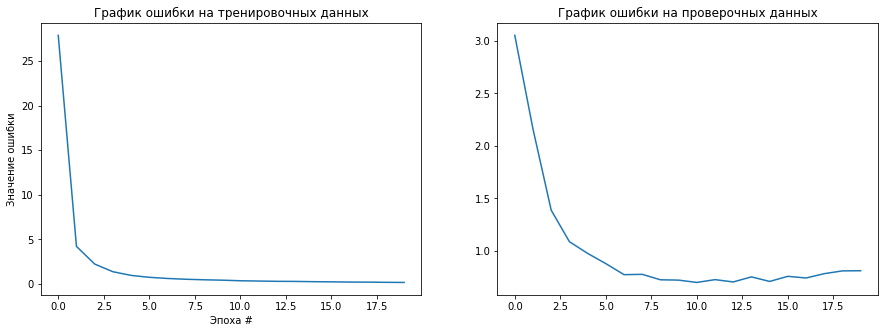

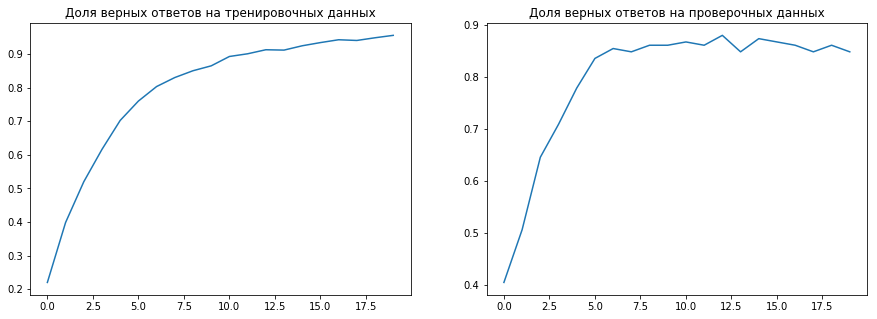

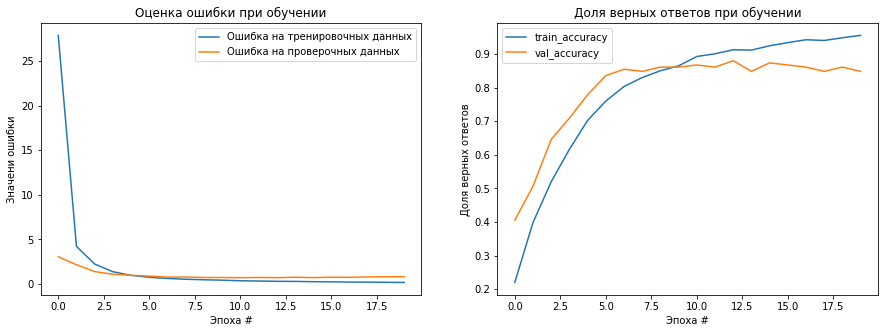

In [23]:
loss, accuracy = model_e.evaluate(x = test_signals_en, y = test_labels,  batch_size=64) # evaluating model on test data
print("test loss: ", loss)
print('Test accuracy:', accuracy)

plot_history(history_e)
network_evaluation(history=history_e, epochs=20, batch_size=None)

#Матрица ошибок сверточной нейронной сети, обученной на сжатой выборке данных


--- Confusion matrix for test data ---



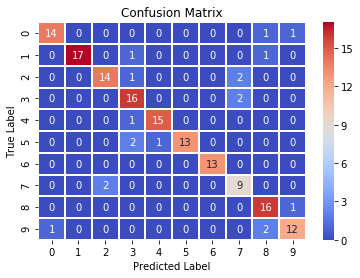

In [24]:
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model_e.predict(test_signals_en)
# Take the class with the highest probability from the test predictions
y_test = np.asarray(y_pred_test).reshape((len(y_pred_test), np.prod(np.asarray(y_pred_test).shape[1:])))
max_y_pred_test = np.argmax(y_test, axis=1)
max_y_test = np.argmax(test_labels, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

In [26]:
print(train_signals.shape)
print(train_signals_en.shape)

(474, 480, 1)
(474, 120, 1)
